In [1]:
# Load necessary modules and dataset 
import sys
sys.path.append(r"/mnt/ceph/users/tudomlumleart/00_VirtualEnvironments/teeu/lib/python3.10/site-packages")
sys.path.append(r"/mnt/home/tudomlumleart/.local/lib/python3.10/site-packages/")
sys.path.append(r"/mnt/home/tudomlumleart/ceph/00_VirtualEnvironments/jupyter-gpu/lib/python3.10/site-packages")

import matplotlib.pyplot as plt
from functions import *
from utils import *

import corner
import csv
import re

In [2]:
stan_directory_esc = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/MCMC_results/20240729_ESC_MCMC/ESC/stan_output/'
stan_directory_cnc = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/MCMC_results/20240729_ESC_MCMC/CNC/stan_output/'

log_weights = []
lp = []
files = sorted(os.listdir(stan_directory_esc))[-4:]
print(files)

['20240715_WeightOptimization-20240729141902_1.csv', '20240715_WeightOptimization-20240729141902_2.csv', '20240715_WeightOptimization-20240729141902_3.csv', '20240715_WeightOptimization-20240729141902_4.csv']


In [3]:
num_metastructures = 12
log_weights_d = []
for file in files:
    log_weights_chain = []
    lp_chain = []
    with open('%s/%s'%(stan_directory_esc, file), newline='') as csvfile:
        reader = csv.DictReader(filter(lambda row: row[0]!='#', csvfile), )
        for row in reader:
            log_weights_row = [float(row["log_weights.%d"%i]) for i in range(1,num_metastructures+1)]
            lp_chain.append(float(row["lp__"]))
            log_weights_chain.append(log_weights_row)
    log_weights = np.array(log_weights_chain)
    lp_chain = np.array(lp_chain)
    log_weights_d.append(log_weights)
    lp.append(lp_chain)
log_weights_d = np.array(log_weights_d)


In [4]:
log_weights_d.shape

(4, 1000, 12)

In [5]:
log_weights_d[0, :]

array([[-2.4890044, -2.2647714, -2.3097216, ..., -2.7151091, -3.1383577,
        -5.0283992],
       [-2.4986146, -2.2664091, -2.3096824, ..., -2.5034654, -2.9278388,
        -4.8696781],
       [-2.4644789, -2.1624333, -2.3491582, ..., -2.4988844, -2.913099 ,
        -5.0433551],
       ...,
       [-2.5639849, -2.3635013, -2.5723405, ..., -2.6213889, -2.7957323,
        -4.1036429],
       [-2.6072127, -2.3816344, -2.569879 , ..., -2.5342646, -2.802723 ,
        -4.0089621],
       [-2.5793464, -2.3270009, -2.3462719, ..., -2.551745 , -2.7506821,
        -4.7255375]])

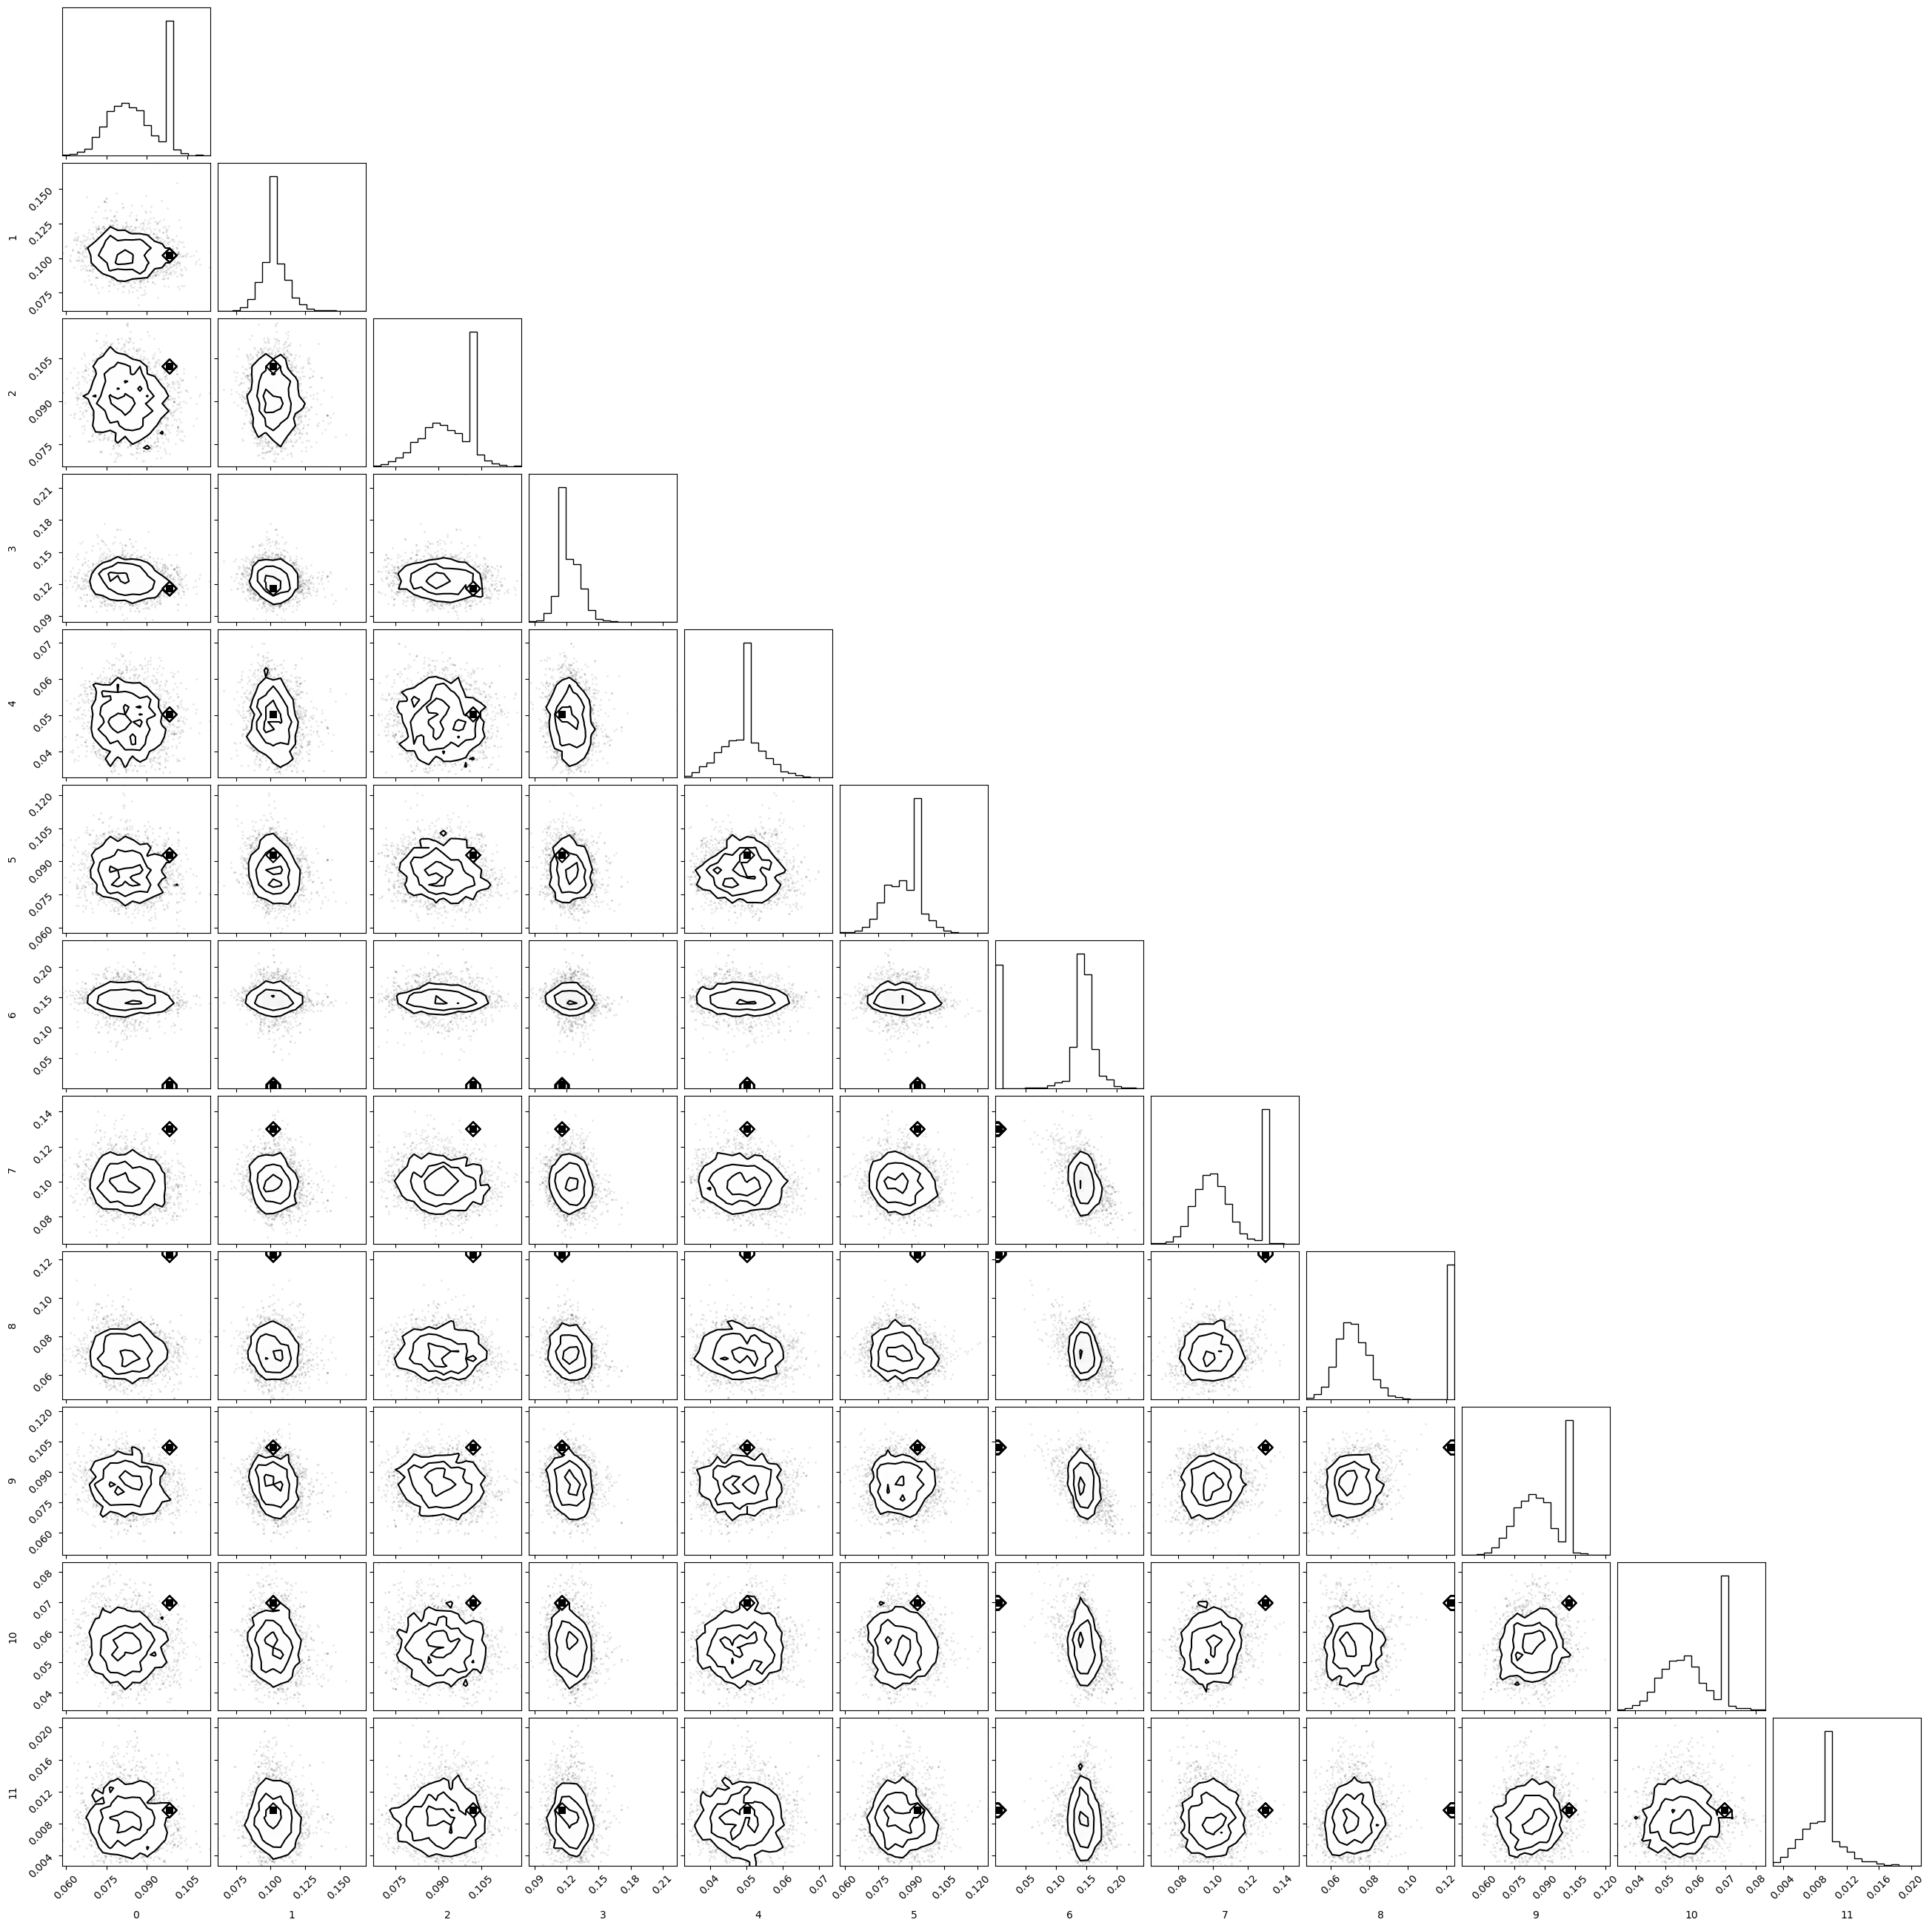

In [7]:
## make corner plot
log_weights_d = np.array(log_weights_d)
log_weights_d_flat = log_weights_d.reshape(-1, num_metastructures)
corner.corner(np.exp(log_weights_d_flat), labels=[str(i) for i in range(num_metastructures)])
plt.savefig(stan_directory_esc + 'corner_plot.png')

In [8]:
log_weights = []
lp = []
files = sorted(os.listdir(stan_directory_cnc))[-4:]
print(files)

num_metastructures = 12
log_weights_d = []
for file in files:
    log_weights_chain = []
    lp_chain = []
    with open('%s/%s'%(stan_directory_cnc, file), newline='') as csvfile:
        reader = csv.DictReader(filter(lambda row: row[0]!='#', csvfile), )
        for row in reader:
            log_weights_row = [float(row["log_weights.%d"%i]) for i in range(1,num_metastructures+1)]
            lp_chain.append(float(row["lp__"]))
            log_weights_chain.append(log_weights_row)
    log_weights = np.array(log_weights_chain)
    lp_chain = np.array(lp_chain)
    log_weights_d.append(log_weights)
    lp.append(lp_chain)
log_weights_d = np.array(log_weights_d)


['20240715_WeightOptimization-20240729142050_1.csv', '20240715_WeightOptimization-20240729142050_2.csv', '20240715_WeightOptimization-20240729142050_3.csv', '20240715_WeightOptimization-20240729142050_4.csv']


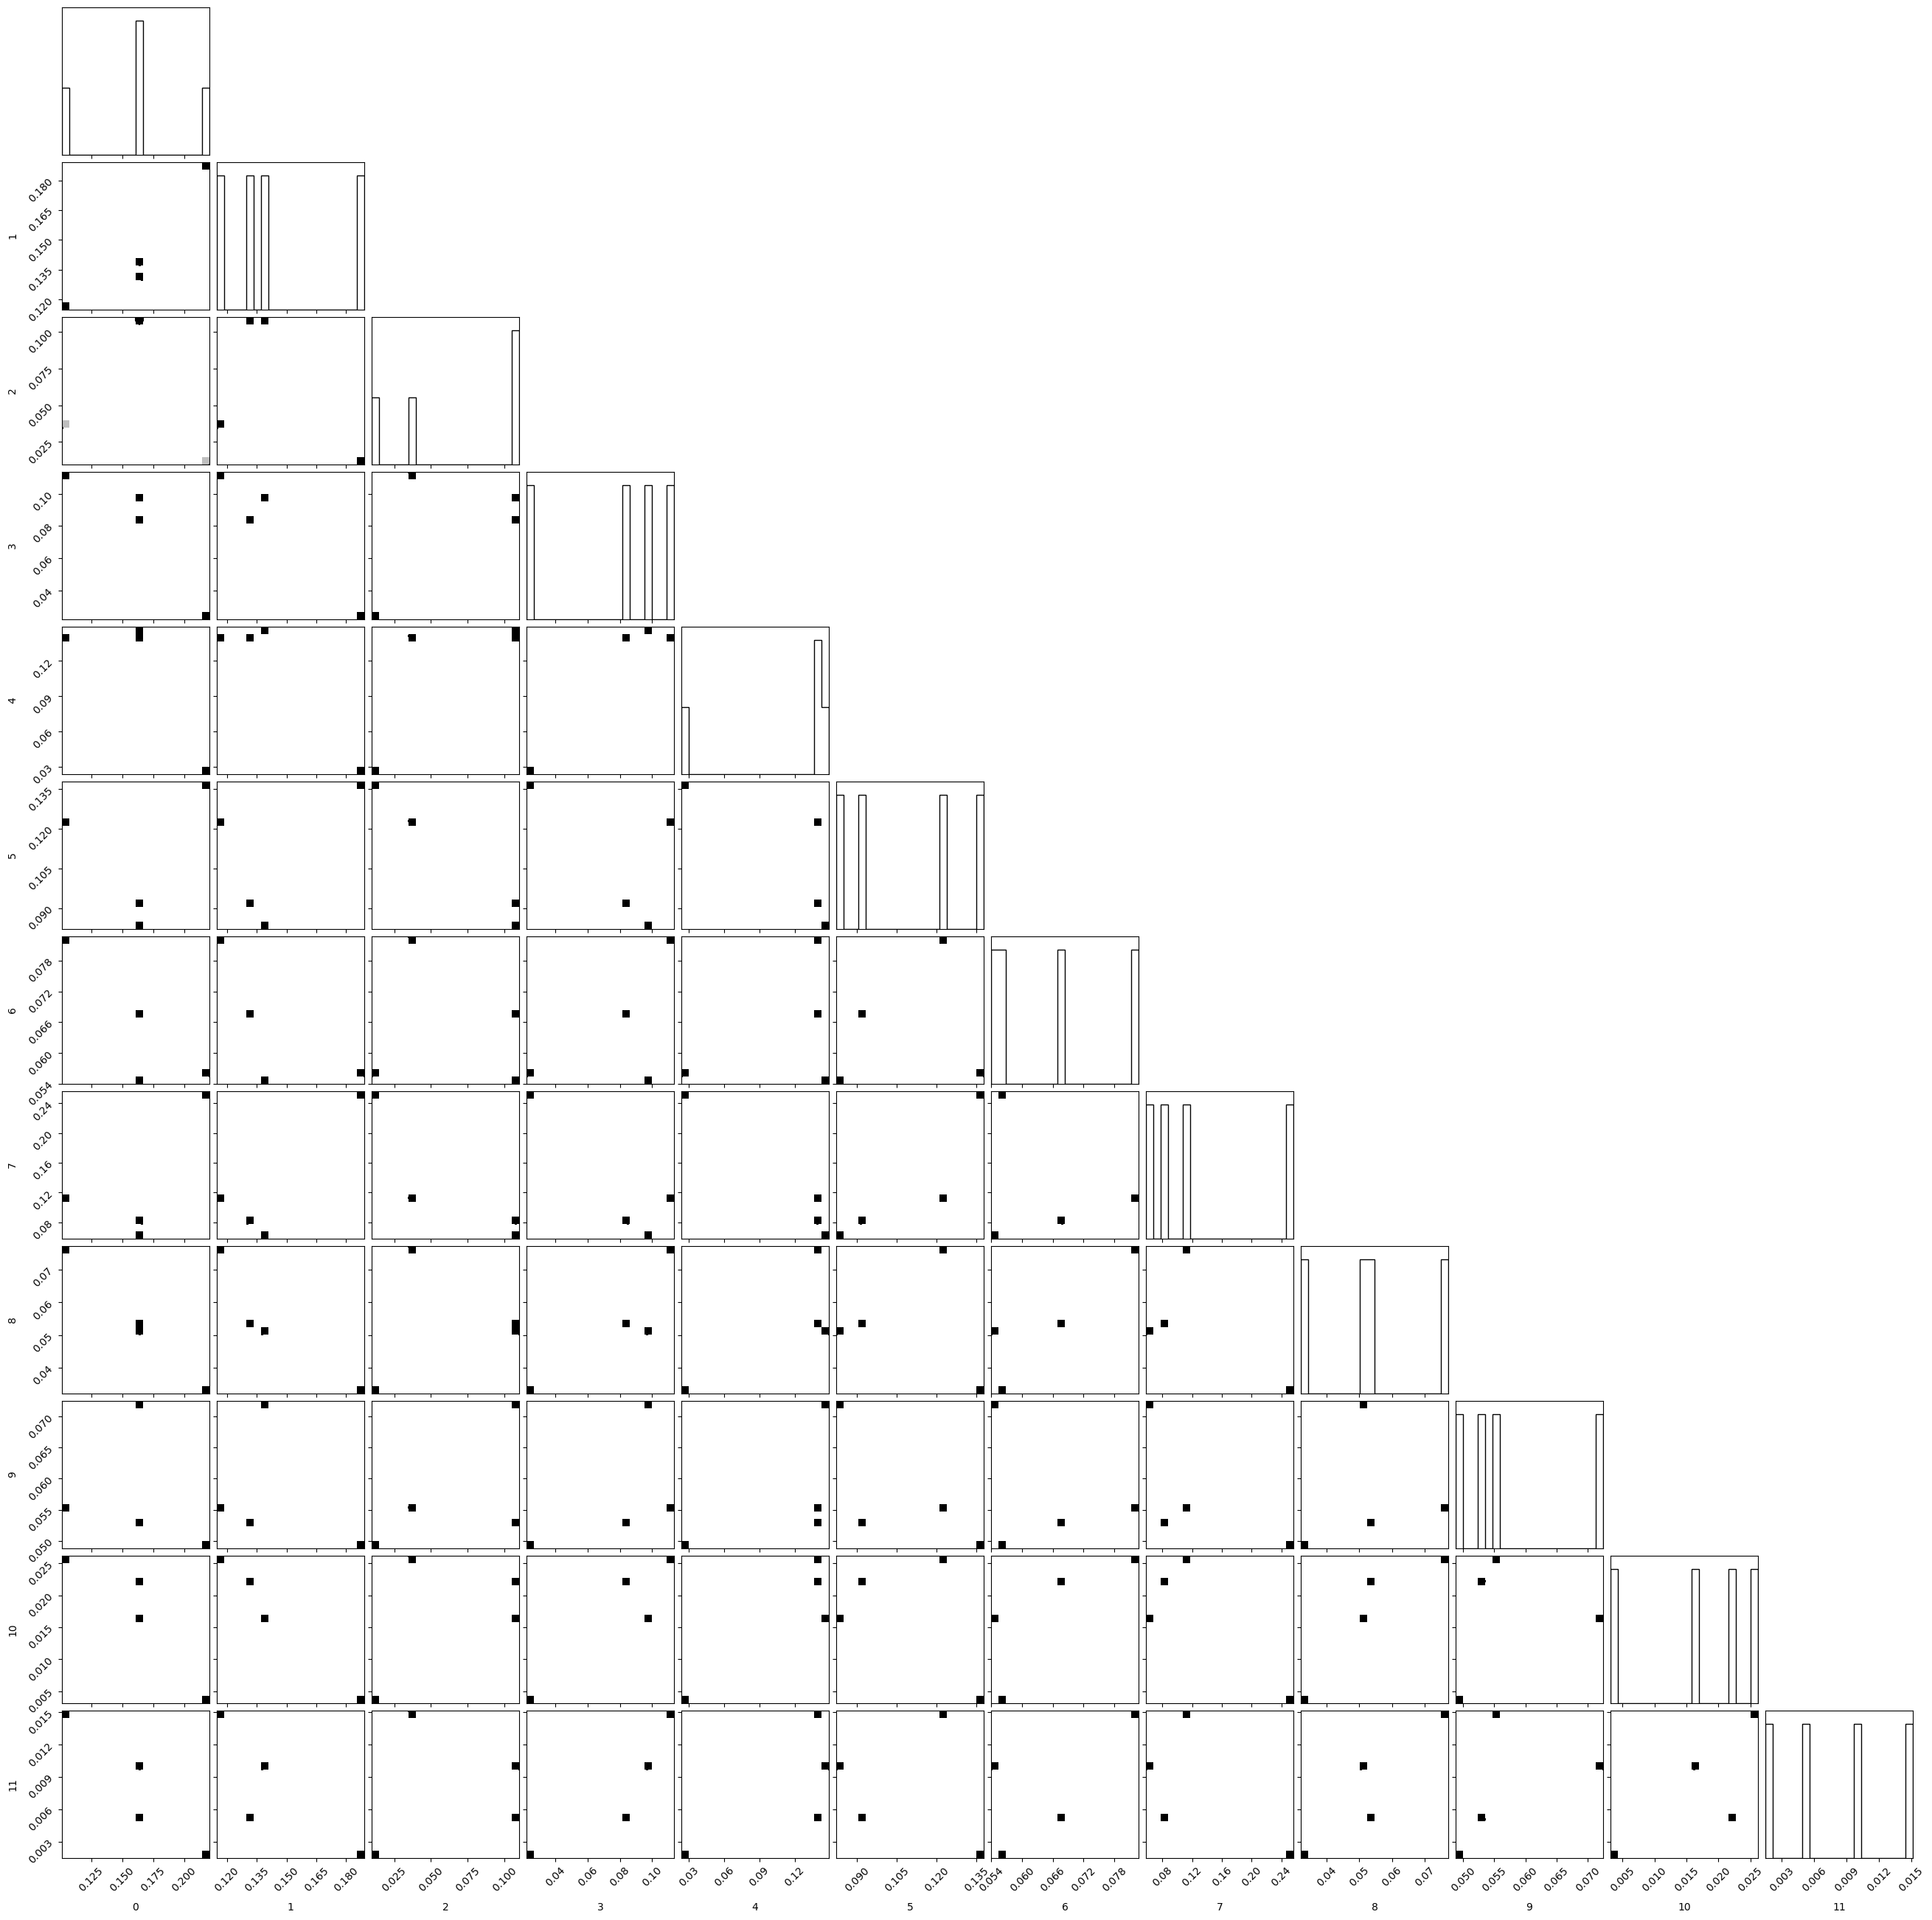

In [9]:
## make corner plot
log_weights_d = np.array(log_weights_d)
log_weights_d_flat = log_weights_d.reshape(-1, num_metastructures)
corner.corner(np.exp(log_weights_d_flat), labels=[str(i) for i in range(num_metastructures)])
plt.savefig(stan_directory_cnc + 'corner_plot.png')